<a href="https://colab.research.google.com/github/ShreshthSaxena/Algorithmic-Trading/blob/master/Algo_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import quandl 
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")

In [1]:

import pandas as pd
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math, time
import tensorflow as tf


Using TensorFlow backend.


In [2]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2012, 10, 1), datetime.datetime(2018, 1, 1))

all_data.head()


High        Low       Open      Close       Volume  \
Ticker Date                                                                  
AAPL   2012-10-01  96.678574  93.785713  95.879997  94.198570  135898700.0   
       2012-10-02  95.192856  92.949997  94.544289  94.472855  156998100.0   
       2012-10-03  95.980003  94.661430  94.980003  95.921425  106070300.0   
       2012-10-04  96.321426  95.078575  95.892860  95.257141   92681400.0   
       2012-10-05  95.142860  93.040001  95.028572  93.227142  148501500.0   

                   Adj Close  
Ticker Date                   
AAPL   2012-10-01  64.749588  
       2012-10-02  64.938141  
       2012-10-03  65.933838  
       2012-10-04  65.477219  
       2012-10-05  64.081856

In [0]:
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2000, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))

In [4]:
all_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03,5284.000000
mean,242.318107,238.656345,240.552463,240.544330,2.571984e+07,231.375313
std,253.487655,249.752604,251.711193,251.715076,3.389500e+07,255.406230
min,26.629999,26.260000,26.379999,26.370001,7.900000e+03,22.696848
25%,69.557499,68.567497,69.019999,69.074644,3.148150e+06,60.366683
50%,146.135002,144.220001,145.105003,145.209999,1.289585e+07,132.298378
75%,243.025017,239.711269,241.761955,242.224743,3.636635e+07,210.309174
max,1078.489990,1063.550049,1075.199951,1077.140015,3.652131e+08,1077.140015


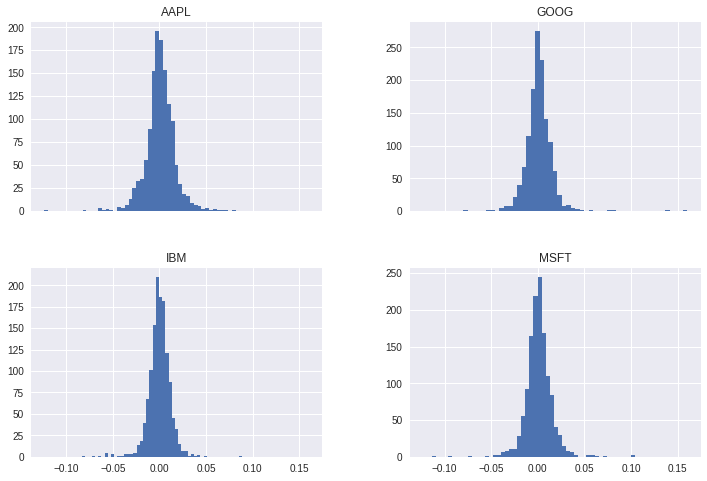

In [0]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

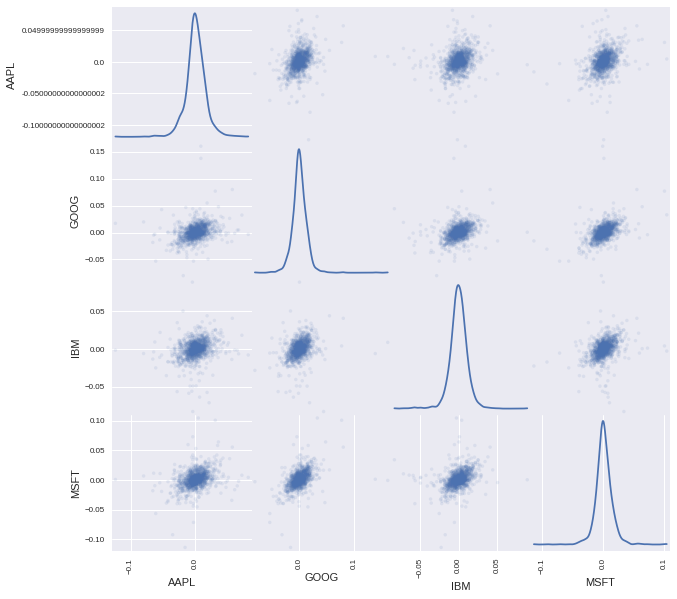

In [0]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change[1:], diagonal='kde', alpha=0.1,figsize=(10,10))

# Show the plot
plt.show()

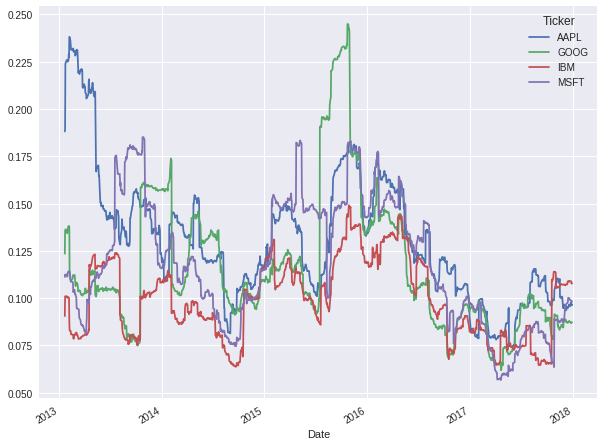

In [0]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

MODEL

In [5]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
from keras.models import load_model
#train_data, validation_data, test_data, train_labels, validation_labels, test_labels, test_images_filenames = import_data()

model = load_model('/content/drive/My Drive/lstm.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [21]:
df= aapl.drop(['Close'],1)
print(df.shape)
df.head()

(2830, 5)


,High,Low,Open,Volume,Adj Close
Date,,,,,
2000-10-02,1.910714,1.678571,1.906250,606197200.0,1.154998
2000-10-03,1.785714,1.584821,1.781250,509530000.0,1.062717
2000-10-04,1.696429,1.562500,1.598214,366506000.0,1.125230
2000-10-05,1.750000,1.571429,1.678571,218251600.0,1.050810
2000-10-06,1.638393,1.500000,1.620536,153164200.0,1.056764


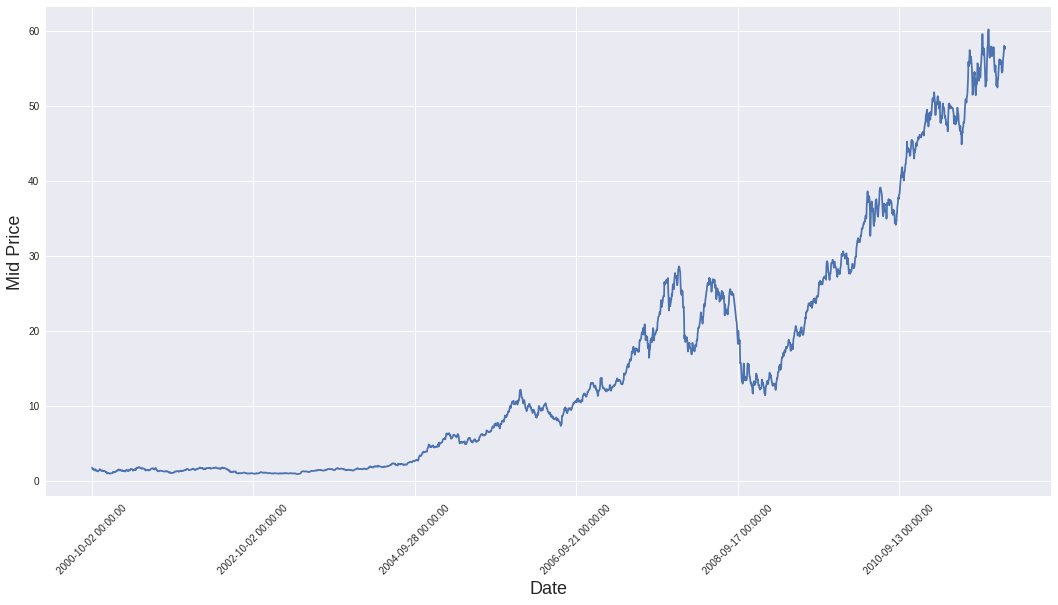

In [23]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df.index[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
    df['Adj Close'] = min_max_scaler.fit_transform(df['Adj Close'].values.reshape(-1,1))
    return df

smoothing_window_size = 500
for di in range(0,3000,smoothing_window_size):
  df[di:di+smoothing_window_size] = normalize_data(df[di:di+smoothing_window_size])


#df.head()

In [0]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

def normalize_data(df):
  smoothing_window_size = 500
  for di in range(0,3000,smoothing_window_size):
      df.loc[di:di+smoothing_window_size,'Open'] = scaler.fit_transform(df.Open.values.reshape(-1,1)[di:di+smoothing_window_size])
      df['High'][di:di+smoothing_window_size] = scaler.fit_transform(df.High.values.reshape(-1,1)[di:di+smoothing_window_size])
      df['Low'][di:di+smoothing_window_size] = scaler.fit_transform(df.Low.values.reshape(-1,1)[di:di+smoothing_window_size])
      df['Volume'][di:di+smoothing_window_size] = scaler.fit_transform(df.Volume.values.reshape(-1,1)[di:di+smoothing_window_size])
      df['Adj Close'][di:di+smoothing_window_size] = scaler.fit_transform(df['Adj Close'].values.reshape(-1,1)[di:di+smoothing_window_size])
      return df
    
df = normalize_data(df)
df.head()


# You normalize the last bit of remaining data
#caler.fit(train_data[di+smoothing_window_size:,:])
#train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [24]:
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
    df['Adj Close'] = min_max_scaler.fit_transform(df['Adj Close'].values.reshape(-1,1))
    return df
df = normalize_data(df)
df.head()

,High,Low,Open,Volume,Adj Close
Date,,,,,
2000-10-02,0.016139,0.013158,0.016492,0.715571,0.013388
2000-10-03,0.014056,0.011556,0.014385,0.599581,0.011057
2000-10-04,0.012568,0.011175,0.011300,0.427967,0.012636
2000-10-05,0.013461,0.011327,0.012655,0.250078,0.010756
2000-10-06,0.011601,0.010107,0.011676,0.171980,0.010907


In [0]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns) # 5
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]


In [26]:
window = 22
X_train, y_train, X_test, y_test = load_data(df, window)
X_train.shape


(2526, 22, 5)

In [0]:
def build_model(layers):
    d = 0.3
    model = Sequential()
    
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # adam = keras.optimizers.Adam(decay=0.2)
        
    start = time.time()
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [26]:
model = build_model([5,window,1])

Compilation Time :  0.03806447982788086


In [27]:
model.fit(X_train,y_train,batch_size=512,epochs=90,validation_split=0.1,verbose=1)

Train on 2273 samples, validate on 253 samples
Epoch 1/90
2273/2273 [==============================] - 2s 960us/step - loss: 64.3240 - acc: 0.0000e+00 - val_loss: 538.3782 - val_acc: 0.0000e+00
Epoch 2/90
2273/2273 [==============================] - 1s 298us/step - loss: 58.5381 - acc: 0.0000e+00 - val_loss: 504.7290 - val_acc: 0.0000e+00
Epoch 3/90
2273/2273 [==============================] - 1s 299us/step - loss: 50.1339 - acc: 0.0000e+00 - val_loss: 456.1207 - val_acc: 0.0000e+00
Epoch 4/90
2273/2273 [==============================] - 1s 299us/step - loss: 40.9910 - acc: 0.0000e+00 - val_loss: 403.6377 - val_acc: 0.0000e+00
Epoch 5/90
2273/2273 [==============================] - 1s 298us/step - loss: 34.4792 - acc: 0.0000e+00 - val_loss: 349.6307 - val_acc: 0.0000e+00
Epoch 6/90
2273/2273 [==============================] - 1s 299us/step - loss: 31.2763 - acc: 0.0000e+00 - val_loss: 304.1847 - val_acc: 0.0000e+00
Epoch 7/90
2273/2273 [==============================] - 1s 302us/step -

In [27]:
diff=[]
ratio=[]
p = model.predict(X_test)
print (p.shape)
# for each data index in test data
for u in range(len(y_test)):
    # pr = prediction day u
    pr = p[u][0]
    # (y_test day u / pr) - 1
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    # print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))
    # Last day prediction
    # print(p[-1]) 

(281, 1)


In [0]:
df= aapl.drop(['Close'],1)

# Bug fixed at here, please update the denormalize function to this one
def denormalize(df, normalized_value): 
    df = df['Adj Close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(df, p)
newy_test = denormalize(df, y_test)

In [29]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]


model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00017 MSE (0.01 RMSE)
Test Score: 0.00731 MSE (0.09 RMSE)


(0.000174571302189554, 0.0073100276775260415)

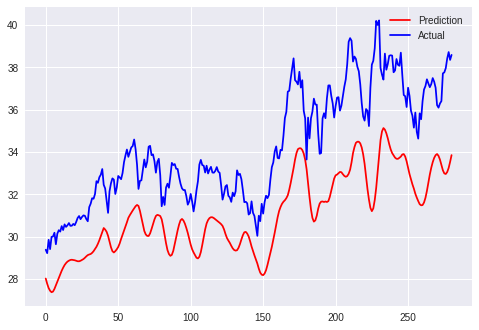

In [30]:
import matplotlib.pyplot as plt2

plt2.plot(newp,color='red', label='Prediction')
plt2.plot(newy_test,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()

In [0]:
pred = pd.DataFrame(index = df.tail(281).index)
pred['Close'] = newp
testy = pd.DataFrame(index = df.tail(281).index)
testy['Close'] = newy_test

In [0]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(2200):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

STRATEGY

In [0]:
d=all_data[['Close']].reset_index().pivot('Date', 'Ticker', 'Close')
d

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2012-10-01,94.198570,378.428680,210.470001,29.490000
2012-10-02,94.472855,376.049164,209.839996,29.660000
2012-10-03,95.921425,378.786346,210.509995,29.860001
2012-10-04,95.257141,381.543427,210.389999,30.030001
2012-10-05,93.227142,381.344727,210.589996,29.850000
2012-10-08,91.167145,376.471405,209.820007,29.780001
2012-10-09,90.835716,369.640839,207.990005,29.280001
2012-10-10,91.558571,369.874329,205.820007,28.980000
2012-10-11,89.728569,373.311951,205.759995,28.950001


In [0]:
# Initialize the short and long windows
short_window = 5
long_window = 20

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=testy.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = testy.rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = testy.rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

In [35]:
signals

,signal,short_mavg,long_mavg,positions
Date,,,,
2010-11-19,0.0,29.380297,29.380297,NaN
2010-11-22,0.0,29.299324,29.299324,0.0
2010-11-23,0.0,29.482854,29.482854,0.0
2010-11-24,0.0,29.464357,29.464357,0.0
2010-11-26,0.0,29.568903,29.568903,0.0
2010-11-29,1.0,29.694071,29.641775,1.0
2010-11-30,1.0,29.887255,29.719275,0.0
2010-12-01,1.0,29.845150,29.709289,0.0
2010-12-02,1.0,29.991275,29.757090,0.0


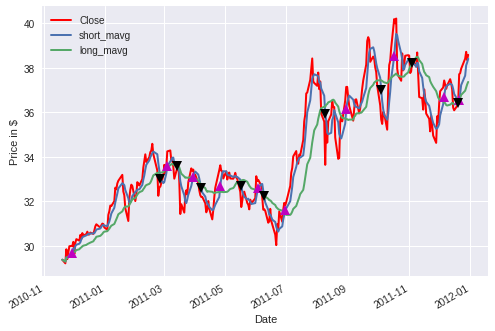

In [39]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
testy.plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [0]:
# Initialize the `signals` DataFrame with the `signal` column
psignals = pd.DataFrame(index=pred.index)
psignals['signal'] = 0.0

# Create short simple moving average over the short window
psignals['short_mavg'] = pred.rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
psignals['long_mavg'] = pred.rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
psignals['signal'][short_window:] = np.where(psignals['short_mavg'][short_window:] 
                                            > psignals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
psignals['positions'] = psignals['signal'].diff()

In [41]:
psignals

,signal,short_mavg,long_mavg,positions
Date,,,,
2010-11-19,0.0,28.019156,28.019156,NaN
2010-11-22,0.0,27.895597,27.895597,0.0
2010-11-23,0.0,27.786540,27.786540,0.0
2010-11-24,0.0,27.700166,27.700166,0.0
2010-11-26,0.0,27.634627,27.634627,0.0
2010-11-29,0.0,27.511057,27.595740,0.0
2010-11-30,0.0,27.461965,27.585860,0.0
2010-12-01,0.0,27.487972,27.599935,0.0
2010-12-02,0.0,27.572589,27.629290,0.0


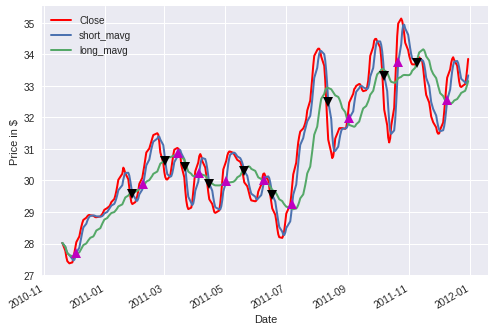

In [42]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
pred.plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
psignals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(psignals.loc[psignals.positions == 1.0].index, 
         psignals.short_mavg[psignals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(psignals.loc[psignals.positions == -1.0].index, 
         psignals.short_mavg[psignals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

BACKTESTING


In [0]:

# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(df['Adj Close'].tail(281), axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(df['Adj Close'].tail(281), axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['Adj Close'].tail(281), axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

In [48]:
portfolio

,AAPL,holdings,cash,total,returns
Date,,,,,
2010-11-19,0.000000,0.000000,100000.000000,100000.000000,NaN
2010-11-22,0.000000,0.000000,100000.000000,100000.000000,0.000000
2010-11-23,0.000000,0.000000,100000.000000,100000.000000,0.000000
2010-11-24,0.000000,0.000000,100000.000000,100000.000000,0.000000
2010-11-26,0.000000,0.000000,100000.000000,100000.000000,0.000000
2010-11-29,3018.427086,3018.427086,96981.572914,100000.000000,0.000000
2010-11-30,2963.939095,2963.939095,96981.572914,99945.512009,-0.000545
2010-12-01,3013.949203,3013.949203,96981.572914,99995.522118,0.000500
2010-12-02,3030.619812,3030.619812,96981.572914,100012.192726,0.000167


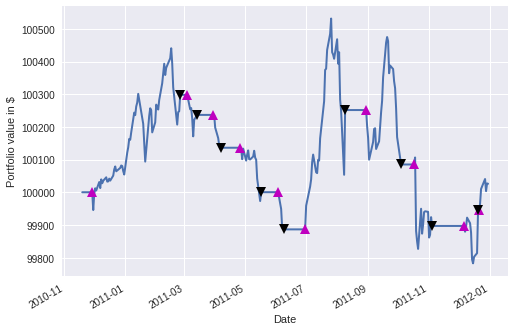

In [53]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [0]:

# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
ppositions = pd.DataFrame(index=psignals.index).fillna(0.0)

# Buy a 100 shares
ppositions['AAPL'] = 100*psignals['signal']   
  
# Initialize the portfolio with value owned   
pportfolio = ppositions.multiply(df['Adj Close'].tail(281), axis=0)

# Store the difference in shares owned 
ppos_diff = ppositions.diff()

# Add `holdings` to portfolio
pportfolio['holdings'] = (ppositions.multiply(df['Adj Close'].tail(281), axis=0)).sum(axis=1)

# Add `cash` to portfolio
pportfolio['cash'] = initial_capital - (ppos_diff.multiply(df['Adj Close'].tail(281), axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
pportfolio['total'] = pportfolio['cash'] + pportfolio['holdings']

# Add `returns` to portfolio
pportfolio['returns'] = pportfolio['total'].pct_change()

In [52]:
pportfolio

,AAPL,holdings,cash,total,returns
Date,,,,,
2010-11-19,0.000000,0.000000,100000.000000,100000.000000,NaN
2010-11-22,0.000000,0.000000,100000.000000,100000.000000,0.000000
2010-11-23,0.000000,0.000000,100000.000000,100000.000000,0.000000
2010-11-24,0.000000,0.000000,100000.000000,100000.000000,0.000000
2010-11-26,0.000000,0.000000,100000.000000,100000.000000,0.000000
2010-11-29,0.000000,0.000000,100000.000000,100000.000000,0.000000
2010-11-30,0.000000,0.000000,100000.000000,100000.000000,0.000000
2010-12-01,0.000000,0.000000,100000.000000,100000.000000,0.000000
2010-12-02,0.000000,0.000000,100000.000000,100000.000000,0.000000


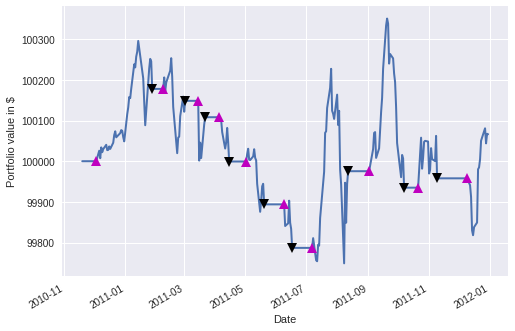

In [55]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
pportfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(pportfolio.loc[psignals.positions == 1.0].index, 
         pportfolio.total[psignals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(pportfolio.loc[psignals.positions == -1.0].index, 
         pportfolio.total[psignals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

EVALUATION

In [56]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.03901387936157988


In [0]:
# Isolate the returns of your strategy
returns = pportfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)